### Calibration evaluation of Epstemic and Aleatoric Uncertainty
- some data details:
1. NAB(https://www.kaggle.com/datasets/boltzmannbrain/nab)

In [1]:
%load_ext autoreload
%autoreload 2

- SMAP(P-1)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

test_data = np.load('datasets/SMAP/tmp/P-1_test.npy')
train_data = np.load('datasets/SMAP/tmp/P-1_train.npy')

training = train_data[:, 0].reshape(-1, 1)
test = test_data[2000: 5000, 0].reshape(-1, 1)
valid = test_data[: 2000, 0].reshape(-1, 1)


scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)
# print(f"raw shape: {readings.shape}")
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")


/home/new_lab/test/ensemble_bae
(8505, 25) (2872, 25)
training shape: (2872, 1)
test shape: (3000, 1)
valid shape: (2000, 1)


- SMAP(E-1)

In [2]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_data = np.load('datasets/SMAP/E-1.npy')

readings = raw_data[0: 6500, 0]
idx_split = [0, 3500, 4500]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: ].reshape(-1,1)

# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)
print(f"raw shape: {raw_data.shape}")
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")
# print(f"lables shape: {lables.shape}")



/home/new_lab/test/ensemble_bae
raw shape: (8516, 25)
training shape: (3500, 1)
test shape: (2000, 1)
valid shape: (1000, 1)


- SMAP(E-13)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_data = np.load('datasets/SMAP/E-13.npy')

readings = raw_data[0: 7000, 0]
idx_split = [0, 4000, 5000]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: ].reshape(-1,1)

# labels (300, 400) (600, 650) (1450, 1550)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)
print(f"raw shape: {raw_data.shape}")
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")
# print(f"lables shape: {lables.shape}")

plt.plot(test)
plt.show()

- NAB(Taxi)

/home/new_lab/test/ensemble_bae
(10320,) [5942, 7183, 8526, 8834, 10080]
training set: (4500, 1)
valid set: (1000, 1)
test set: (4820, 1)
anomalies (in test set): [ 442 1683 3026 3334 4580]


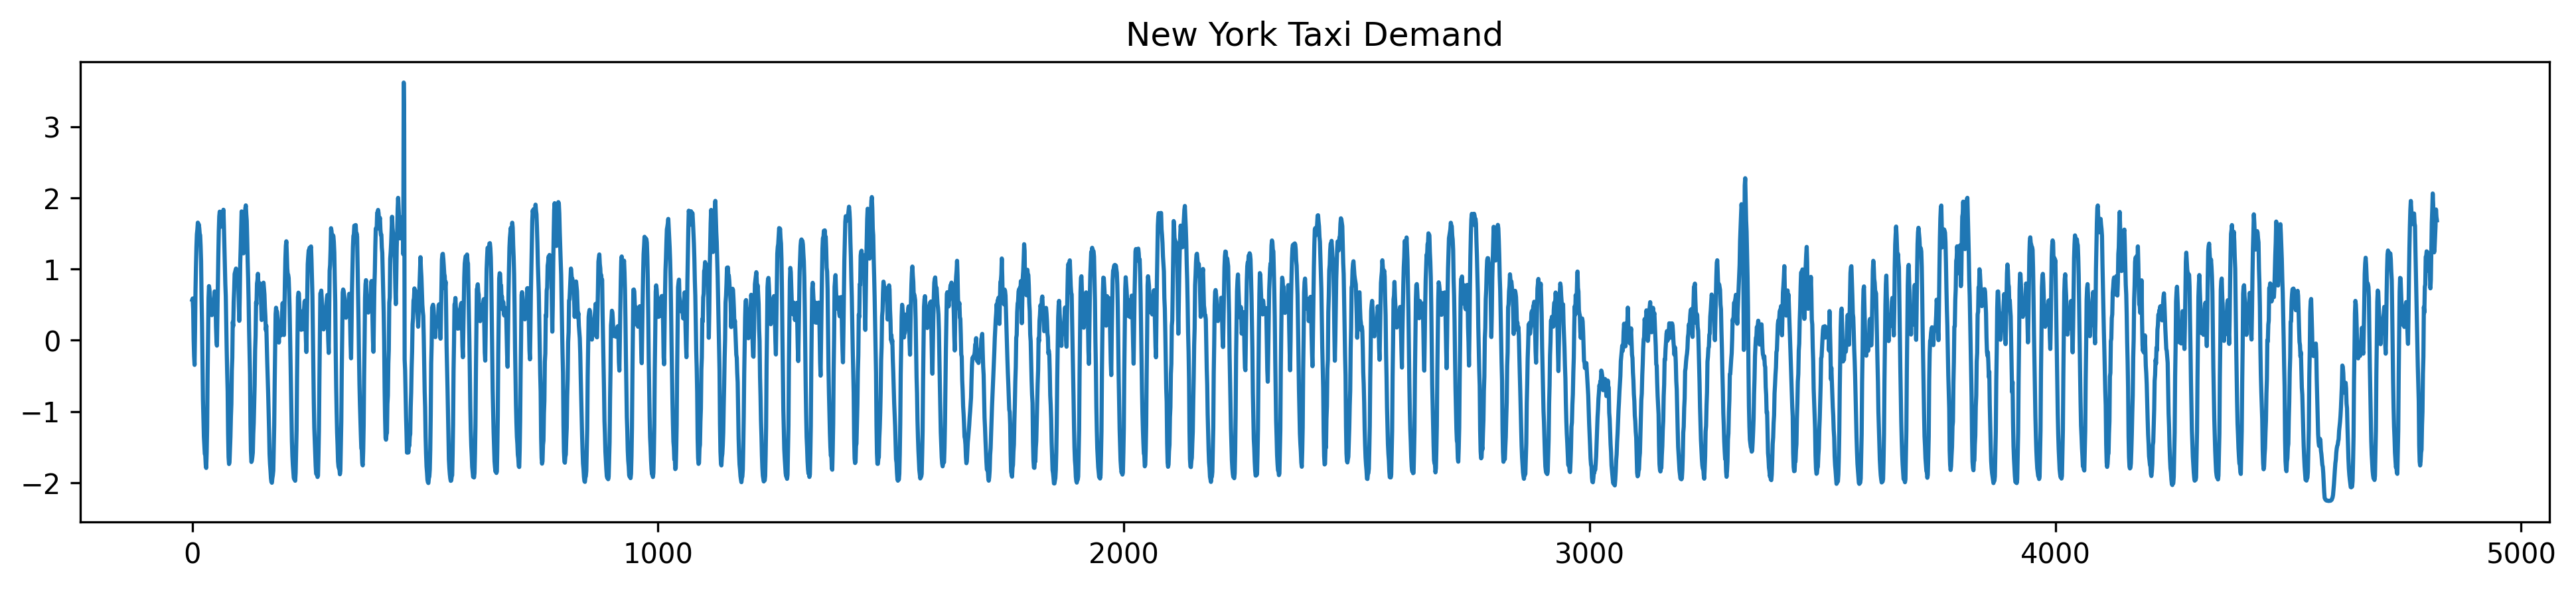

In [2]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

data_dir = 'datasets/NAB-known-anomaly/csv-files/nyc_taxi.csv'
def load_data(data_dir):
    raw = pd.read_csv(data_dir)
    anomalies_label = [         
        "2014-11-01 19:00:00",
        "2014-11-27 15:30:00",
        "2014-12-25 15:00:00",  # NOTE: we ignored SOME due to train/valid/test split strategy
        "2015-01-01 01:00:00",
        "2015-01-27 00:00:00"
        ]
    
    anomalies_idx = []
    for label in anomalies_label:
        anomalies_idx.append(raw[raw['timestamp'] == label].index[0])

    return raw['value'].values, anomalies_idx

readings, idx_anomaly = load_data(data_dir)
print(readings.shape, idx_anomaly)
# split reading into training and test sets
idx_split = [0, 4500, 5500, 7500]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: ].reshape(-1,1)

# standardize the data
scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[2]

print(f"training set: {training.shape}")
print(f"valid set: {valid.shape}")
print(f"test set: {test.shape}")
print(f"anomalies (in test set): {idx_anomaly_test}")

fig, ax = plt.subplots(figsize=(16, 3), dpi=300)
ax.set_title("New York Taxi Demand")
ax.plot(test.flatten(), label='original signal')
# ax[1].axhline(y=threshold, color='r', linestyle='--', label='threshold')
# plt.savefig("usecase2", dpi=300)



In [23]:
print(test.shape)
df = pd.DataFrame(test, columns=['value'])
df.to_csv('NY_Texi.csv', index=False)

(4820, 1)


- NAB(Machine Temp)

In [251]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

data_dir = 'datasets/NAB-known-anomaly/csv-files/machine_temperature_system_failure.csv'
def load_data(data_dir):
    raw = pd.read_csv(data_dir)

    anomalies_label = [         
         "2013-12-11 06:00:00",
         "2013-12-16 17:25:00",
        #  "2014-01-28 13:55:00", 
        #  "2014-02-08 14:30:00"
        ]
    
    anomalies_idx = []
    for label in anomalies_label:
        anomalies_idx.append(raw[raw['timestamp'] == label].index[0])

    return raw['value'].values, anomalies_idx

readings, idx_anomaly = load_data(data_dir)
print(readings.shape, idx_anomaly)
# split reading into training and test sets
idx_split = [0, 2000, 4500, 10000]
training = readings[idx_split[2]: idx_split[3]].reshape(-1,1)
valid = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
test = readings[idx_split[1]: idx_split[2]].reshape(-1,1)

# standardize the data
scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

idx_anomaly_test = np.asarray(idx_anomaly) - idx_split[1]

print(f"training set: {training.shape}")
print(f"valid set: {valid.shape}")
print(f"test set: {test.shape}")
print(f"anomalies (in test set): {idx_anomaly_test}")



/home/new_lab/test/ensemble_bae
(22695,) [2409, 3986]
training set: (5500, 1)
valid set: (2000, 1)
test set: (2500, 1)
anomalies (in test set): [ 409 1986]


- SMD(machine-2-1)

In [2]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_test = np.genfromtxt('datasets/SMD/test/machine-2-1.txt',
                         dtype=np.float64,
                         delimiter=',')

# raw_train = np.genfromtxt('datasets/SMD/train/machine-1-1.txt',
#                          dtype=np.float64,
#                          delimiter=',')


raw_labels = np.genfromtxt('datasets/SMD/labels/machine-2-1.txt',
                         dtype=np.float64,
                         delimiter=',')

# [[15849, 16368],[16963, 17517], [18071, 18528], [19367, 20088], [20786,21195]]
# [[6506, 6530], [7900, 7960], [9340, 9380]]
# idx_split = [0, 12000, 15000, 19000]
print(raw_test.shape)
idx_split = [0, 5000, 6000, 9600]
readings = raw_test[:, 31]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[2]: idx_split[3]].reshape(-1,1)

# valid = training[(int)(0.8 * training.shape[0]): ].reshape(-1, 1)
# training = training[: (int)(0.8 * training.shape[0])].reshape(-1, 1)
# test = raw_test[15000: 18000, 0].reshape(-1,1)
labels = raw_labels.reshape(-1,1)

# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
valid = scaler.transform(valid)
test = scaler.transform(test)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")
print(f"lables shape: {labels.shape}")




/home/new_lab/test/ensemble_bae
(23694, 38)
training shape: (5000, 1)
test shape: (3600, 1)
valid shape: (1000, 1)
lables shape: (23694, 1)


- SMD(machine-1-3)

In [176]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_test = np.genfromtxt('datasets/SMD/test/machine-1-3.txt',
                         dtype=np.float64,
                         delimiter=',')

print(raw_test.shape)
idx_split = [1280, 4500, 6000, 7000]
readings = raw_test[:, 11]
training = readings[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = readings[idx_split[2]: idx_split[3]].reshape(-1,1)
test = readings[idx_split[1]: idx_split[2]].reshape(-1,1)

# valid = training[(int)(0.8 * training.shape[0]): ].reshape(-1, 1)
# training = training[: (int)(0.8 * training.shape[0])].reshape(-1, 1)
# test = raw_test[15000: 18000, 0].reshape(-1,1)


# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
valid = scaler.transform(valid)
test = scaler.transform(test)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")





/home/new_lab/test/ensemble_bae
(23703, 38)
training shape: (3220, 1)
test shape: (1500, 1)
valid shape: (1000, 1)


- SMD(machine-3-4)

/home/new_lab/test/ensemble_bae
(23687, 38)
(23687, 38)
training shape: (6000, 1)
test shape: (2500, 1)
valid shape: (1000, 1)


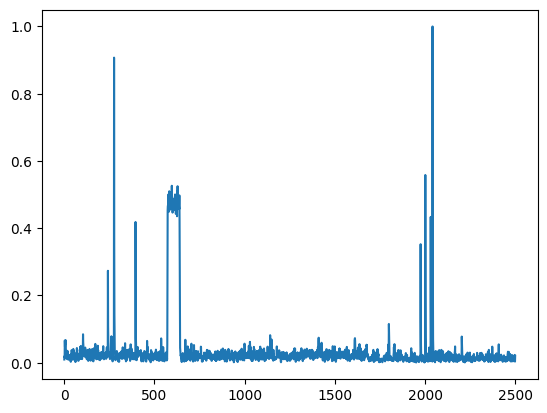

In [6]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_test = np.genfromtxt('datasets/SMD/test/machine-3-4.txt',
                         dtype=np.float64,
                         delimiter=',')

print(raw_test.shape)
idx_split = [2500, 5000, 6000, 12000]
readings = raw_test[:, 1]
training = readings[idx_split[2]: idx_split[3]].reshape(-1,1)
valid = readings[idx_split[1]: idx_split[2]].reshape(-1,1)
test = readings[idx_split[0]: idx_split[1]].reshape(-1,1)

# valid = training[(int)(0.8 * training.shape[0]): ].reshape(-1, 1)
# training = training[: (int)(0.8 * training.shape[0])].reshape(-1, 1)
# test = raw_test[15000: 18000, 0].reshape(-1,1)


# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
valid = scaler.transform(valid)
test = scaler.transform(test)
print(raw_test.shape)
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

plt.plot(readings[2500: 5000])
plt.show()


- MSL(F-7)

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

raw_data_train = np.load('datasets/MSL/F-7_train.npy')[:, 0]
raw_data_test = np.load('datasets/MSL/F-7_test.npy')[:, 0]
print(raw_data_test.shape, raw_data_train.shape)
training = raw_data_train.reshape(-1,1)
valid = raw_data_test[4000: ].reshape(-1,1)
test = raw_data_test[: 4000].reshape(-1,1)

# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")


fig = go.Figure()

fig.add_trace(go.Scatter(y=test.flatten(),mode='lines', name='original signal', line=dict(color='gray')))
fig.update_layout(
    # width=1400,
    # height=660,
    title="SWaT Dataset",
    xaxis_title="Time",
    yaxis_title="Value",
    showlegend=True,
   plot_bgcolor='white',
)
fig.show()

/home/new_lab/test/ensemble_bae
(5054,) (2511,)
training shape: (2511, 1)
test shape: (4000, 1)
valid shape: (1054, 1)


- MSL(P-11)

/home/new_lab/test/ensemble_bae
(3535,) (3969,)
training shape: (3969, 1)
test shape: (2500, 1)
valid shape: (1035, 1)


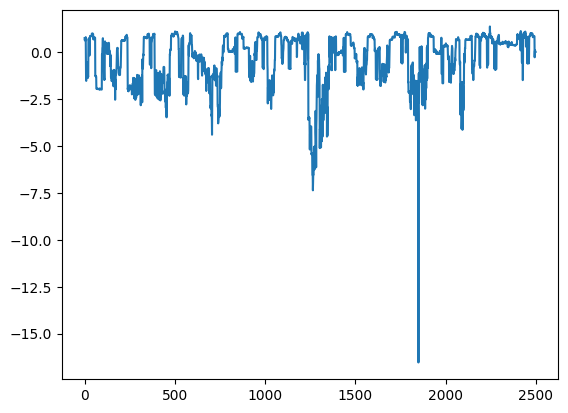

In [9]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_data_train = np.load('datasets/MSL/P-11_train.npy')[:, 0]
raw_data_test = np.load('datasets/MSL/P-11_test.npy')[:, 0]
print(raw_data_test.shape, raw_data_train.shape)
training = raw_data_train.reshape(-1,1)
valid = raw_data_test[2500: ].reshape(-1,1)
test = raw_data_test[:2500].reshape(-1,1)

# labels (500, 530, ) (1100, 1500)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

plt.plot(test)
plt.show()


- UCR(InternalBleeding16)

/home/new_lab/test/ensemble_bae
(7501,)
training shape: (4000, 1)
test shape: (2000, 1)
valid shape: (1500, 1)


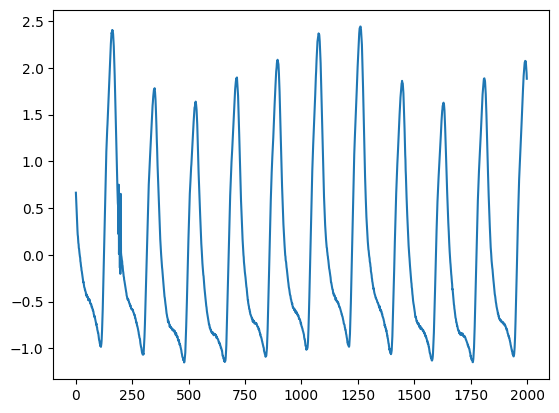

[2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997 2998]


In [24]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# raw_data_train = np.load('datasets/UCR/135_train.npy')
# print(raw_data_train.shape)
raw_data_test = np.genfromtxt('datasets/UCR/135_UCR_Anomaly_InternalBleeding16_1200_4187_4199.txt',
								dtype=np.float64,
								delimiter=',')
print(raw_data_test.shape)
data_label = np.load('datasets/UCR/135_labels.npy')
idx_split = [0, 4000, 6000, 7500] # [0, 3500, 4500, 5500] #
training = raw_data_test[idx_split[0]: idx_split[1]].reshape(-1,1)
valid = raw_data_test[idx_split[2]: idx_split[3]].reshape(-1,1)
test = raw_data_test[idx_split[1]: idx_split[2]].reshape(-1,1)

# labels (4185, 4200)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

plt.plot(test)

plt.show()
print(np.where(data_label > 0)[0])

- UCR(InternalBleeding17)

/home/new_lab/test/ensemble_bae
(7500,)
training shape: (3500, 1)
test shape: (3000, 1)
valid shape: (1000, 1)


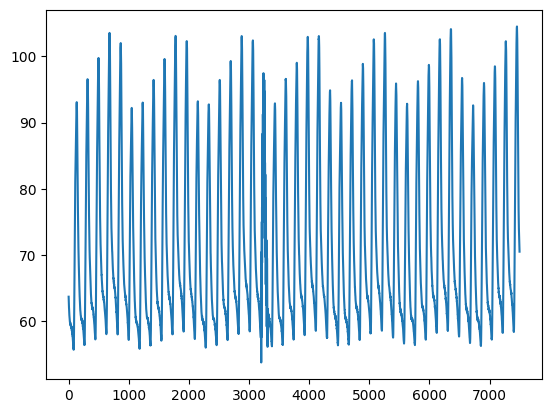

[2987 2988 2989 2990 2991 2992 2993 2994 2995 2996 2997 2998]


In [23]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

# raw_data_train = np.load('datasets/UCR/135_train.npy')
# print(raw_data_train.shape)
raw_data_test = np.genfromtxt('datasets/UCR/136_UCR_Anomaly_InternalBleeding17_1600_3198_3309.txt',
								dtype=np.float64,
								delimiter=',')
print(raw_data_test.shape)
data_label = np.load('datasets/UCR/135_labels.npy')
idx_split = [0, 1000, 4000] # [1000, 2000, 4000]
training = raw_data_test[idx_split[2]: ].reshape(-1,1)
valid = raw_data_test[idx_split[0]: idx_split[1]].reshape(-1,1)
test = raw_data_test[idx_split[1]: idx_split[2]].reshape(-1,1)

# labels (3200, 3300)
# lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# lables[2150:2350] = 0

scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)

print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")

plt.plot(raw_data_test)

plt.show()
print(np.where(data_label > 0)[0])

In [ ]:
import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

raw_data_train = np.load('datasets/SWaT/train.npy')
raw_data_test = np.load('datasets/SWaT/test.npy')
labels = np.load('datasets/SWaT/labels.npy')
print(raw_data_test.shape, raw_data_train.shape, labels)
# training = raw_data_train.reshape(-1,1)
# valid = raw_data_test[2500: ].reshape(-1,1)
# test = raw_data_test[:2500].reshape(-1,1)

# # labels (500, 530, ) (1100, 1500)
# # lables = np.ones(idx_split[1] - idx_split[0]) # 2150 - 2350 is anomaly
# # lables[2150:2350] = 0

# scaler = StandardScaler()
# scaler.fit(training)
# training = scaler.transform(training)
# test = scaler.transform(test)
# valid = scaler.transform(valid)

# print(f"training shape: {training.shape}")
# print(f"test shape: {test.shape}")
# print(f"valid shape: {valid.shape}")


plt.plot(labels[: 2000])
plt.plot(raw_data_test)
plt.show()


In [10]:

import os
print(os.getcwd())
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import utils

anomaly_index = [(351, 538), (614, 702), (984, 1060), (1292, 1369), (1451, 1490), (1541, 1626), (2282, 2474), (3076, 3220)]

# test_data = pd.read_csv('datasets/SWaT/swat_test.csv')
# train_data = pd.read_csv('datasets/SWaT/swat_train.csv')
# valid_data = pd.read_csv('datasets/SWaT/swat_valid.csv')

# training = train_data['value'].to_numpy().reshape(-1, 1)
# test = test_data['value'].to_numpy().reshape(-1, 1)
# valid = valid_data['value'].to_numpy().reshape(-1, 1)
# scaler = StandardScaler()
# scaler.fit(training)
# training = scaler.transform(training)
# test = scaler.transform(test)
# valid = scaler.transform(valid)




test_df = pd.read_csv('datasets/SWaT/SWaT_test_original.csv')
test_np = test_df['PIT502'].to_numpy() # AIT501 504 FIT502 PIT502
test_label = test_df['label'].to_numpy()
anomaly_index = utils.get_anomaly_segment(test_label)
test = test_np[0: 4000].reshape(-1, 1)
training = test_np[4000: 16000].reshape(-1, 1)
valid = test_np[16000: 18000].reshape(-1, 1)



scaler = StandardScaler()
scaler.fit(training)
training = scaler.transform(training)
test = scaler.transform(test)
valid = scaler.transform(valid)
# training = 2 * (training - np.min(training)) / (np.max(training) - np.min(training)) - 1
# test = 2 * (test - np.min(test)) / (np.max(test) - np.min(test)) - 1
# valid = 2 * (valid - np.min(valid)) / (np.max(valid) - np.min(valid)) - 1
# df_test.to_csv('swat_test.csv', index=False)

# df_train = pd.DataFrame(test_np[4000: 16000], columns=['value'])
# df_train.to_csv('swat_train.csv', index=False)

        
print(f"training shape: {training.shape}")
print(f"test shape: {test.shape}")
print(f"valid shape: {valid.shape}")
print(anomaly_index)
fig = go.Figure()

fig.add_trace(go.Scatter(y=test.flatten(),mode='lines', name='original signal', line=dict(color='gray')))
fig.update_layout(
    # width=1400,
    # height=660,
    title="SWaT Dataset",
    xaxis_title="Time",
    yaxis_title="Value",
    showlegend=True,
   plot_bgcolor='white',
)
fig.show()


/home/new_lab/test/ensemble_bae
training shape: (12000, 1)
test shape: (4000, 1)
valid shape: (2000, 1)
[(351, 538), (614, 702), (984, 1060), (1292, 1369), (1451, 1490), (1541, 1626), (2282, 2474), (3076, 3220), (18137, 18183), (18428, 18514), (18689, 18744), (20619, 20761), (23169, 23220), (23229, 23307), (23400, 23544), (26584, 26676), (28591, 28730), (34454, 34517), (34582, 34704), (39660, 39948), (45566, 52745), (55824, 55848), (56012, 56246), (60531, 60603), (69536, 69655), (72239, 72326), (74296, 74315), (74371, 74467), (77936, 78043), (87309, 87401), (87484, 87539), (87630, 87709), (87725, 87783), (88701, 89038)]


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from model import VAEModule, AutoEncoder
from dataloader import VAESegLoader


class Config:
    # model
    seq_len = 10
    in_channel = 1
    win_size = 128
    latent_dim = 10
    hidden_num_units = 64
    sigma = 0.1
    sigma2_offset = 0.01
    hidden_num_units_lstm = 64
    num_layers_lstm = 1
    
    # training
    n_epochs = 15
    lr = 1e-3
    batch_size = 64

config = Config()
train_dataset = VAESegLoader(training, config.win_size, "train")
valid_dataset = VAESegLoader(valid, config.win_size, "valid")

train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

valid_dataloader =  DataLoader(
    dataset = valid_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config.device = device


In [10]:
from bae_ensemble import BAE_Ensemble
from model import VAEModule, AutoEncoder, MLP
import utils
M = 30
# bvae_ens = BAE_Ensemble(10, VAEModule, config)


def valid(data_loader):
    bvae_ens.eval()
    total_loss = []
    with torch.no_grad():
        for i, x in enumerate(data_loader):
            x = x.view(config.batch_size, config.in_channel, -1)
            x = x.to(device)
            loss = bvae_ens.fit(x).to(device)
            total_loss.append(loss.item())
    return np.average(total_loss)

def train(data_loader, bvae_ens, config):

    bvae_ens.train()
    for epoch in range(config.n_epochs):
        print(f"-------------- epoch: {epoch} ----------------")
        total_loss = []
        for i, x in enumerate(data_loader):
            bvae_ens.zero_optimizers()
            x = x.view(config.batch_size, config.in_channel, -1) # [batch_size, in_channel, win_size]
            x = x.to(device)
            # proportion = torch.ones_like(x) * 0.8
            # mask = torch.bernoulli(proportion)
            # x = x * mask
            # print("input: ", x.shape)  
            x.requires_grad = False
            loss = bvae_ens.fit(x)
            total_loss.append(loss.item())
            if (i + 1) % 20 == 0:
                print(f"     batch: {i + 1}, batch_loss: {loss.item()}     ")
            
            loss.backward()
            bvae_ens.step_optimizers()
        train_loss = np.average(total_loss)
        valid_loss = valid(valid_dataloader)
        print(f">>>> Epoch: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss} <<<<")
        # if epoch >= 10: 
        #     # bvae_ens.adjust_lr(epoch - 10)ff


# train(train_dataloader, bvae_ens, config)
# bvae_ens.set_optimizers_lr(1e-5)
# bvae_ens.tunning_var()
# print("******************* tunning variance *******************")
# train(train_dataloader, bvae_ens, config)

bvae_ens = BAE_Ensemble(M, AutoEncoder, config)
bvae_ens.toDevice(device)



config.n_epochs = 8
print(config.device)
train(train_dataloader, bvae_ens, config)
# # bvae_ens.tunning_var()
print("******************* tunning variance *******************")
config.n_epochs = 13
bvae_ens.tunning_var(1e-4)
bvae_ens.set_loss_type('rnll')
train(train_dataloader, bvae_ens, config)

######### homo ##############
# log_var_approx = torch.nn.Parameter(torch.ones(1) * np.log(2)) # homo
# optim = torch.optim.SGD([{'params': log_var_approx}], 1e-4)



cuda
-------------- epoch: 0 ----------------
     batch: 20, batch_loss: 366.78570556640625     
>>>> Epoch: 0, train_loss: 364.13735384554474, valid_loss: 363.11485290527344 <<<<
-------------- epoch: 1 ----------------
     batch: 20, batch_loss: 353.78472900390625     
>>>> Epoch: 1, train_loss: 350.0290807775549, valid_loss: 339.84244210379467 <<<<
-------------- epoch: 2 ----------------
     batch: 20, batch_loss: 327.5313415527344     
>>>> Epoch: 2, train_loss: 336.8075289339633, valid_loss: 331.8390655517578 <<<<
-------------- epoch: 3 ----------------
     batch: 20, batch_loss: 345.0     
>>>> Epoch: 3, train_loss: 332.63547330289276, valid_loss: 329.71622794015065 <<<<
-------------- epoch: 4 ----------------
     batch: 20, batch_loss: 327.73516845703125     
>>>> Epoch: 4, train_loss: 330.7253005569046, valid_loss: 328.5516379220145 <<<<
-------------- epoch: 5 ----------------
     batch: 20, batch_loss: 326.25579833984375     
>>>> Epoch: 5, train_loss: 328.8359688423

(3840,)


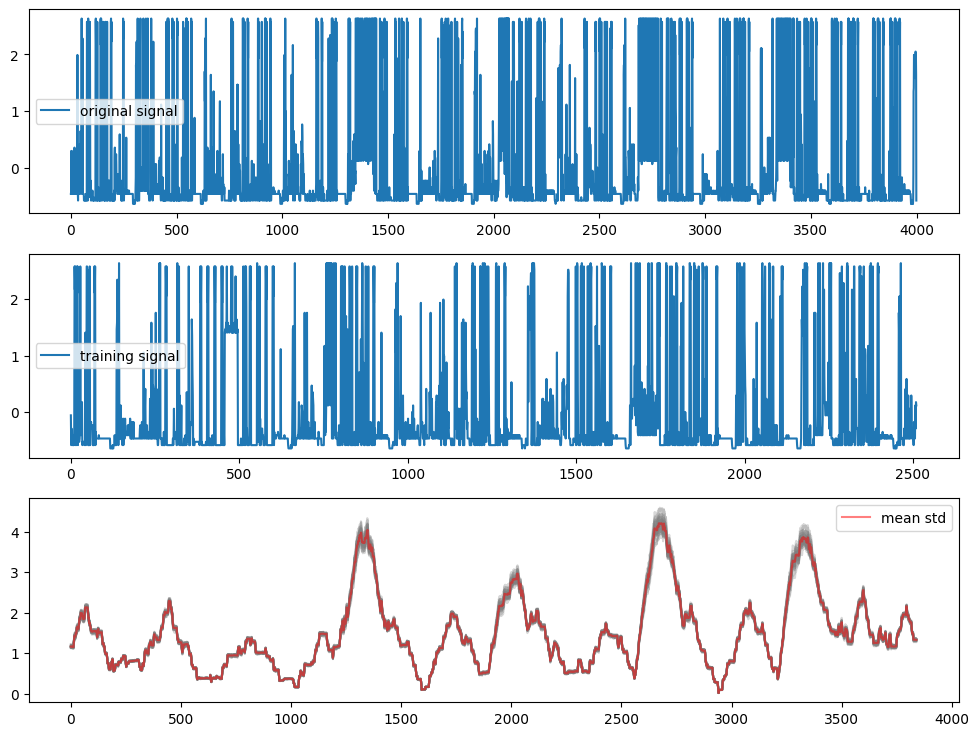

In [11]:
# anomaly detection only vae on test
test_dataset = VAESegLoader(test, config.win_size, "test")

test_dataloader =  DataLoader(
    dataset = test_dataset, 
    batch_size = config.batch_size,
    shuffle=False,
    drop_last=True,
)

# for visualization
data_len = len(test_dataloader) * config.batch_size
prefix_len = config.win_size - 1
error = np.zeros((data_len, M))
var_of_error = np.zeros((data_len, M))
var_mult_error = np.zeros((data_len, M))
var_of_window_power_2 = np.zeros((data_len, M))

bvae_ens.eval()
for i, x in enumerate(test_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    x = x.to(config.device)
    predictions = bvae_ens.predict_stack_values(x) # (10, batch_size, in_channel, win_size)

    for m in range(M):
        error[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).cpu().detach().numpy()
        # var_of_window_power_2[i*config.batch_size: (i+1)*config.batch_size, m] = 2 * torch.sum(torch.exp(log_var[m])**2, dim=(1,2)).detach().numpy()
        # var_of_error[i*config.batch_size: (i+1)*config.batch_size, m] = torch.sum(torch.exp(log_var[m]), dim=(1,2)).detach().numpy()
        # var_mult_error[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean(torch.exp(log_var[m]) * ((x-predictions[m])**2), dim=(1, 2)).detach().numpy()
        

error_std = np.std(error, axis=1)
error_mean = np.mean(error, axis=1)
upper_bound = np.mean(error, axis=1) + 2 * error_std
lower_bound = np.mean(error, axis=1) - 2 * error_std
print(error_std.shape)

# plot the reconstruction error
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 9))
ax[0].plot(test.flatten(), label='original signal')
ax[0].legend()
ax[1].plot(training.flatten(), label='training signal')
ax[1].legend()
for i in range(M):
    ax[2].plot(error[:, i], color='gray', alpha=0.3)
ax[2].plot(error_mean, color='r', label='mean std', alpha=0.5)
ax[2].legend()
# ax[1].axhline(y=threshold, color='r', linestyle='--', label='threshold')
plt.show()


[(1250, 1534), (2670, 2895), (3325, 3542)]
(3967,) (3967,) (4000, 1) (3967,)


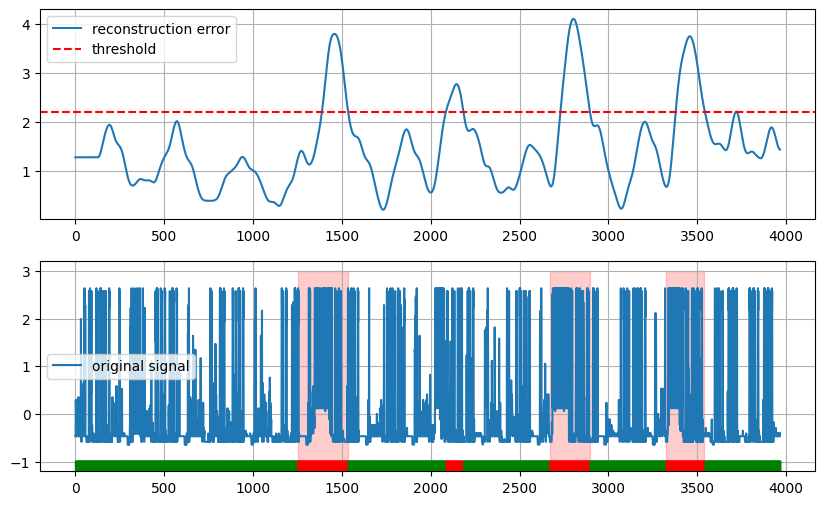

In [ ]:
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter1d
# 1.确定FN/FP/TN/TP，具体做法是按照label的数据范围将数据分为FN+FP和TN+TP两类

# anomaly_index = [[150, 350], [1550, 1750], [2550, 2850]] SMAP-P1
# anomaly_index = [[521, 522], [2980, 2981]] NAB-ambient
# anomaly_index = [(500, 535), (1100, 1500)]  # SMAP-E1
# anomaly_index = [(300, 400), (600, 650), (1450, 1550)] # SMAP-E13
# anomaly_index = [[442, 452], [1683, 1693], [3026, 3036], [3334, 3344], [4580, 4590]]  # NAB texi 442 1683 3026 3334 4580
# anomaly_index = [[409, 410], [1986, 1987]] NAB Machine Temp
# anomaly_index = [[849, 1368],[1963, 2517]] SMD machine-1-1 (not used)
# anomaly_index = [[506, 530], [1900, 1960], [3340, 3380]] # SMD machine-2-1
# anomaly_index = [[372, 375], [1113, 1161]] SMD machine-1-3
# anomaly_index = [[234, 1020], [1974, 2050]] SMD machine-3-4
anomaly_index = [[1250, 1450], [2670, 2790], [3325, 3425]] # MSL F-7
# anomaly_index = [[1778, 1898], [1238, 1344]] # MSL P-11
# anomaly_index = [[185, 200]] # UCR 135
# anomaly_index = [[2200,2310]] # UCR 136

train_dataloader =  DataLoader(
    dataset = train_dataset, 
    batch_size = config.batch_size,
    shuffle=True,
    drop_last=True,
)

data_len = len(train_dataloader) * config.batch_size
train_nll = np.zeros((data_len, M))

bvae_ens.eval()
for i, x in enumerate(train_dataloader):
    x = x.view(config.batch_size, config.in_channel, -1)
    x = x.to(config.device)
    # predictions, _ = bvae_ens.predict(x) # (10, batch_size, in_channel, win_size)
    predictions = bvae_ens.predict_stack_values(x)
    for m in range(M):
        train_nll[i*config.batch_size: (i+1)*config.batch_size, m] = torch.mean((x - predictions[m])**2, dim=(1,2)).detach().cpu().numpy()

train_nll_mean = np.mean(train_nll, axis=1)
threshold = np.percentile(train_nll_mean, 95)

filter_win = 30
recons_error_smoothed = np.convolve(error_mean, np.ones(filter_win)/filter_win, mode='same')
# recons_error_smoothed = gaussian_filter1d(error_mean, sigma=15)
prefix = np.ones(config.win_size - 1) * recons_error_smoothed[0]
recons_error_smoothed = np.concatenate((prefix, recons_error_smoothed))

# construct predict label and adjust
predict_label = np.zeros(recons_error_smoothed.shape)
predict_label[recons_error_smoothed > threshold] = 1

gd_label = np.zeros(recons_error_smoothed.shape)
for index in anomaly_index:
    gd_label[index[0]: index[1]] = 1

pred, gd = utils.adjuct_pred(predict_label, gd_label)
pred, gd = utils.adjuct_gt(pred, gd)

anomaly_index = utils.get_anomaly_segment(gd) 
print(anomaly_index)
for index in anomaly_index:
    gd_label[index[0]: index[1]] = 1

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
ax[0].plot(recons_error_smoothed, label='reconstruction error')
ax[0].axhline(y=threshold, color='r', linestyle='--', label='threshold')
ax[0].legend()
ax[0].grid()
ax[1].plot(test.flatten()[: len(recons_error_smoothed)], label='original signal')

for index in anomaly_index:
    ax[1].fill_between(np.arange(index[0], index[1]), -1, 3, color='red', alpha=0.2)
ax[1].grid()
ax[1].legend()

print(predict_label.shape, gd_label.shape, test.shape, recons_error_smoothed.shape)
# adjust the predict label



for idx in range(len(predict_label)):
    if pred[idx] == 1:
        ax[1].axvline(x=idx, color='r', ymin=0., ymax=0.05, linewidth=1)
    else:
        ax[1].axvline(x=idx, color='g', ymin=0., ymax=0.05, linewidth=1)


In [10]:

# expand error to the same shape as the original signal
error_of_expand = []
for i in range(M):
    prefix = np.ones(config.win_size-1) * error[0, i]
    error_of_expand.append(np.concatenate((prefix, error[:, i])))
error_of_expand = np.array(error_of_expand)

filter_win = 30
for m in range(M):
    error_of_expand[m] = np.convolve(error_of_expand[m], np.ones(filter_win)/filter_win, mode='same')

pred_prob = []
for i in range(error_of_expand.shape[1]):
    pred_i = 0
    for m in range(M):
        if error_of_expand[m, i] > threshold:
            pred_i += 1
    pred_i = pred_i / M
    pred_prob.append(pred_i)
pred_prob = np.array(pred_prob)

print(error_of_expand.shape, gd_label.shape, pred_prob.shape)
split_probs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# split_probs = np.linspace(0, 0.5, 10)
print(split_probs)
calibration_data = []

for prob in split_probs:
    obser_num = 0
    if prob == split_probs[0]:
        idx_s = np.where((pred_prob <= prob) & (pred_prob >= 0))[0]
    else:
        idx_s = np.where((pred_prob <= prob) & (pred_prob > round(prob - 0.1, 2)))[0]
    if len(idx_s) == 0:
        continue
    for i in idx_s:
        if gd_label[i] == 1:
            obser_num += 1
    calibration_data.append((prob, obser_num / len(idx_s)))



(30, 3583) (3583,) (3583,)
[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


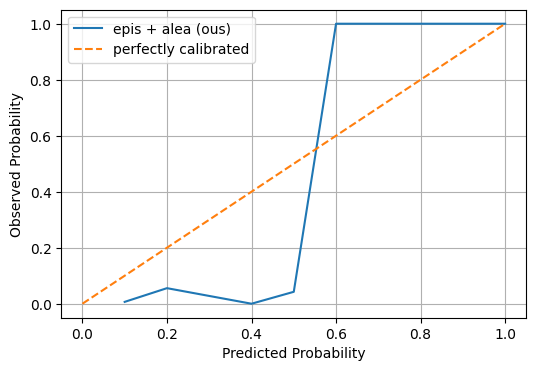

In [11]:
# plot calibration
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
calibration_data = np.array(calibration_data)
ax.plot(calibration_data[:, 0], calibration_data[:, 1], label='epis + alea (ous)')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Probability')
ax.grid()
# ax.plot(calibration_data2[:, 0], calibration_data2[:, 1], label='epis')
ax.plot([0, 1], [0, 1], linestyle='--', label='perfectly calibrated')
ax.legend()
plt.show()

# data_name = "NAB_ambient_Epis_Alea_Calibration"
# df = pd.DataFrame(calibration_data, columns=['Predicted Probability', 'Observed Probability'])
# df.to_csv(f'./result/{data_name}_calibration.csv', index=False)

In [187]:
calibration_data_epis = calibration_data

In [193]:
calibration_data_epis_alea = calibration_data

(8, 2) (6, 2)


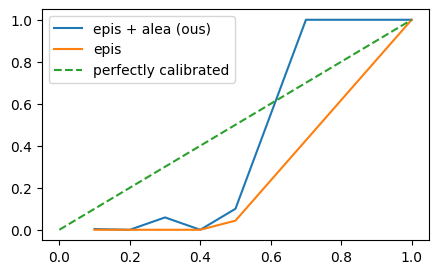

In [194]:
# plot calibration
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
print(calibration_data_epis_alea.shape, calibration_data_epis.shape)
ax.plot(calibration_data_epis_alea[:, 0], calibration_data_epis_alea[:, 1], label='epis + alea (ous)')
ax.plot(calibration_data_epis[:, 0], calibration_data_epis[:, 1], label='epis')
ax.plot([0, 1], [0, 1], linestyle='--', label='perfectly calibrated')
ax.legend()
plt.show()


# utils.logging("calibration-log", "SMAP-P1", calibration_data_epis, calibration_data_epis_alea)

In [ ]:
data_name = "UCR-InternalBleeding17_Epis_Alea"
df = pd.DataFrame(calibration_data_epis_alea, columns=['Predicted Probability', 'Observed Probability'])
df.to_csv(f'./result/{data_name}_calibration.csv', index=False)

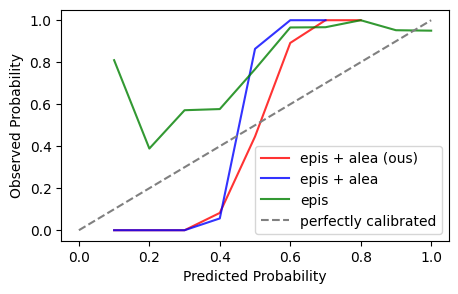

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_epis_alea_ours = pd.read_csv(f'./result_3_31/SMAP_P1_epis_alea_ours_calibration_seed5.csv')
df_epis_alea = pd.read_csv(f'./result_3_31/SMAP_P1_epis_alea_calibration_seed5.csv')
df_epis = pd.read_csv(f'./result_3_31/SMAP_P1_epis_calibration_seed1.csv')
calibration_data_epis_alea_ours_obser = df_epis_alea_ours['Observed Probability'].values
calibration_data_epis_alea_ours_pred = df_epis_alea_ours['Predicted Probability'].values
calibration_data_epis_alea_obser = df_epis_alea['Observed Probability'].values
calibration_data_epis_alea_pred = df_epis_alea['Predicted Probability'].values
calibration_data_epis_obser = df_epis['Observed Probability'].values
calibration_data_epis_pred = df_epis['Predicted Probability'].values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
# print(calibration_data_epis_alea.shape, calibration_data_epis.shape)
ax.plot(calibration_data_epis_alea_ours_pred, calibration_data_epis_alea_ours_obser, color='red', alpha=0.8, label='epis + alea (ous)')
ax.plot(calibration_data_epis_alea_pred, calibration_data_epis_alea_obser, color='blue', alpha=0.8, label='epis + alea')
ax.plot(calibration_data_epis_pred, calibration_data_epis_obser,color='green', alpha=0.8, label='epis')

ax.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=1, label='perfectly calibrated')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Probability')
ax.legend()
# plt.show()


(5, 8) (5, 10) (5, 10)


Text(0, 0.5, 'Observed Probability')

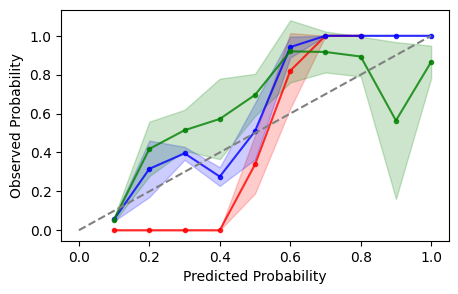

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['lines.markersize'] = 3

result_dir = 'result_3_32'
dataset = 'SMAP_E13'
ea_ous = 'epis_alea_ours'
ea = 'epis_alea'
e = 'epis'

ea_ous_obsers = [[] for i in range(5)]
# ea_ous_preds = [[] for i in range(5)]
ea_obsers = [[] for i in range(5)]
# ea_preds = [[] for i in range(5)]
e_obsers = [[] for i in range(5)]
# e_preds = [[] for i in range(5)]
for seed in [1,2,3,4,5]:

    df_epis_alea_ours = pd.read_csv(f'./{result_dir}/{dataset}_{ea_ous}_calibration_seed{seed}.csv')
    df_epis_alea = pd.read_csv(f'./{result_dir}/{dataset}_{ea}_calibration_seed{seed}.csv')
    df_epis = pd.read_csv(f'./{result_dir}/{dataset}_{e}_calibration_seed{seed}.csv')

    calibration_data_epis_alea_ours_pred = df_epis_alea_ours['Predicted Probability'].values
    calibration_data_epis_alea_pred = df_epis_alea['Predicted Probability'].values
    calibration_data_epis_pred = df_epis['Predicted Probability'].values


    calibration_data_epis_alea_ours_obser = df_epis_alea_ours['Observed Probability'].values
    # calibration_data_epis_alea_ours_pred = df_epis_alea_ours['Predicted Probability'].values
    ea_ous_obsers[seed-1].extend(calibration_data_epis_alea_ours_obser.flatten())
    # ea_ous_preds[seed-1].extend(calibration_data_epis_alea_ours_pred.flatten())
    
    calibration_data_epis_alea_obser = df_epis_alea['Observed Probability'].values
    # calibration_data_epis_alea_pred = df_epis_alea['Predicted Probability'].values
    ea_obsers[seed-1].extend(calibration_data_epis_alea_obser.flatten())
    # ea_preds[seed-1].extend(calibration_data_epis_alea_pred.flatten())

    calibration_data_epis_obser = df_epis['Observed Probability'].values
    # calibration_data_epis_pred = df_epis['Predicted Probability'].values
    e_obsers[seed-1].extend(calibration_data_epis_obser.flatten())
    # e_preds[seed-1].extend(calibration_data_epis_pred.flatten())


ea_ous_obsers = np.array(ea_ous_obsers)

# ea_ous_preds = np.array(ea_ous_preds)
ea_obsers = np.array(ea_obsers)
# ea_preds = np.array(ea_preds)
e_obsers = np.array(e_obsers)
# e_preds = np.array(e_preds)
print(ea_ous_obsers.shape, ea_obsers.shape, e_obsers.shape, )

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))
# print(calibration_data_epis_alea.shape, calibration_data_epis.shape)
ea_ours_obsers_upper = np.mean(ea_ous_obsers, axis=0) + 1 * np.std(ea_ous_obsers, axis=0)
ea_ours_obsers_lower = np.mean(ea_ous_obsers, axis=0) - 1 * np.std(ea_ous_obsers, axis=0)
ea_obsers_upper = np.mean(ea_obsers, axis=0) + 1 * np.std(ea_obsers, axis=0)
ea_obsers_lower = np.mean(ea_obsers, axis=0) - 1 * np.std(ea_obsers, axis=0)
e_obsers_upper = np.mean(e_obsers, axis=0) + 1 * np.std(e_obsers, axis=0)
e_obsers_lower = np.mean(e_obsers, axis=0) - 1 * np.std(e_obsers, axis=0)

ax.fill_between(calibration_data_epis_alea_ours_pred, ea_ours_obsers_upper, ea_ours_obsers_lower, color='red', alpha=0.2)
ax.fill_between(calibration_data_epis_alea_pred, ea_obsers_upper, ea_obsers_lower, color='blue', alpha=0.2)
ax.fill_between(calibration_data_epis_pred, e_obsers_upper, e_obsers_lower, color='green', alpha=0.2)

ax.plot(calibration_data_epis_alea_ours_pred, np.mean(ea_ous_obsers, axis=0), color='red', alpha=0.8, label='epis + alea (ous)', marker='o', linestyle='-')
ax.plot(calibration_data_epis_alea_pred, np.mean(ea_obsers, axis=0), color='blue', alpha=0.8, label='epis + alea', marker='o', linestyle='-')
ax.plot(calibration_data_epis_pred, np.mean(e_obsers, axis=0),color='green', alpha=0.8, label='epis', marker='o', linestyle='-')

ax.plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=1, label='perfectly calibrated')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('Observed Probability')
# ax.legend()
# plt.show()


SMAP_E13 (0, 0): (5, 10) (5, 10) (5, 10)
SMAP_E13:  mse_epis: 0.0323, mse_epis_alea: 0.0550, mse_ours: 0.0464
SMAP_P1 (0, 1): (5, 10) (5, 10) (5, 10)
SMAP_P1:  mse_epis: 0.0354, mse_epis_alea: 0.0286, mse_ours: 0.0283
SMD_machine2-1 (0, 2): (5, 10) (5, 10) (5, 10)
SMD_machine2-1:  mse_epis: 0.0573, mse_epis_alea: 0.0239, mse_ours: 0.0347
NAB_Ambient (1, 0): (5, 10) (5, 10) (5, 10)
NAB_Ambient:  mse_epis: 0.0453, mse_epis_alea: 0.0476, mse_ours: 0.0483
NAB_Texi (1, 1): (5, 10) (5, 10) (5, 10)
NAB_Texi:  mse_epis: 0.0578, mse_epis_alea: 0.0561, mse_ours: 0.0569
NAB_Machine (1, 2): (5, 10) (5, 10) (5, 10)
NAB_Machine:  mse_epis: 0.0271, mse_epis_alea: 0.0412, mse_ours: 0.0325
SMD_machine3-4 (2, 0): (5, 10) (5, 10) (5, 10)
SMD_machine3-4:  mse_epis: 0.0311, mse_epis_alea: 0.0239, mse_ours: 0.0149


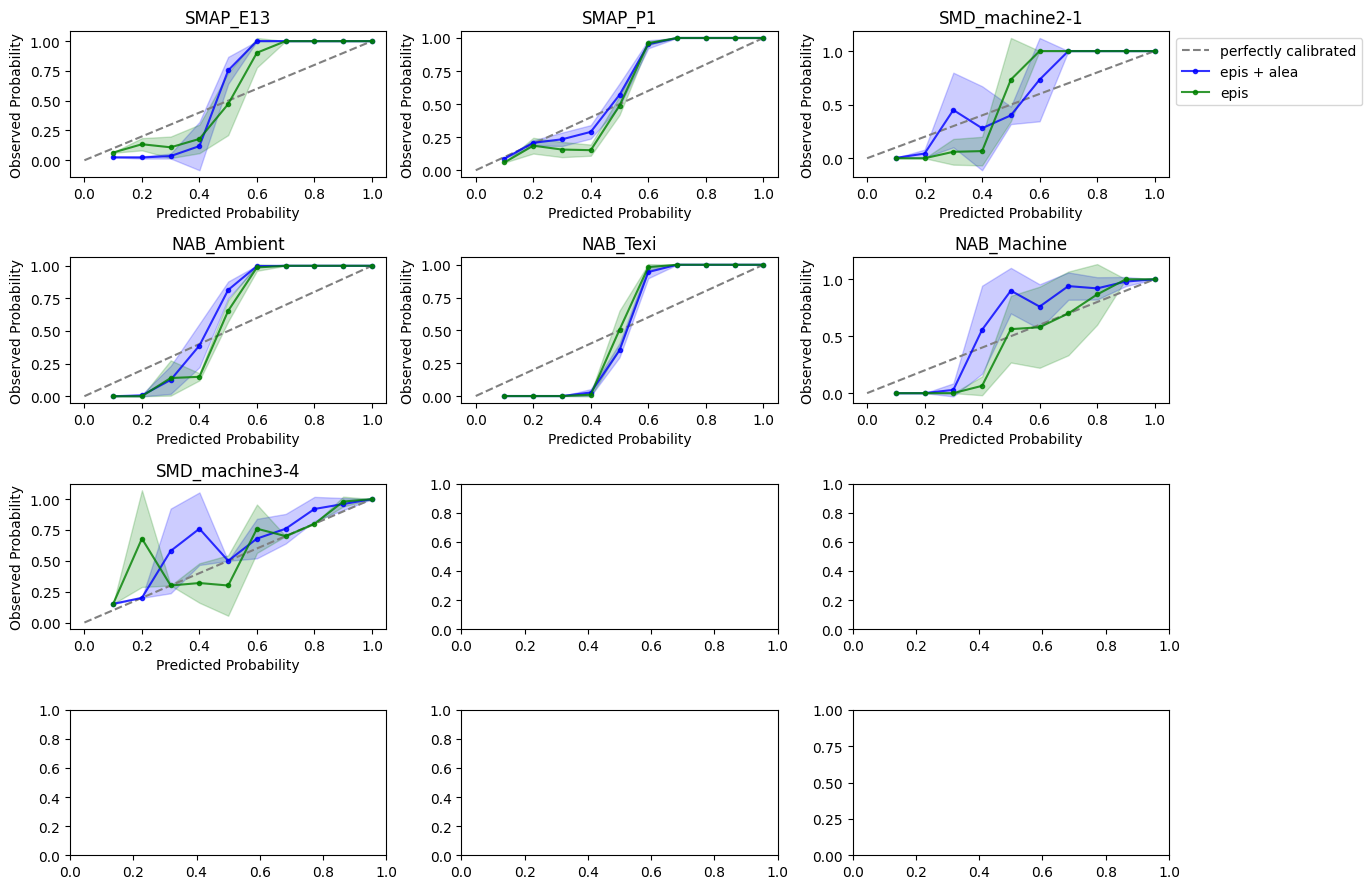

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['lines.markersize'] = 3
fig, axes = plt.subplots(4, 3, figsize=(12, 9))

result_dir = 'result_5_28/tmp'
ea_ous = 'epis_alea_ours'
ea = 'epis_alea'
e = 'epis'
dataset_list =  ["SMAP_E13", "SMAP_P1", "SMD_machine2-1", "NAB_Ambient", "NAB_Texi", "NAB_Machine",  "SMD_machine3-4"] # ,    # "SMD_machine1-3" ,
for index, dataset in enumerate(dataset_list):

    row = index // 3
    col = index % 3
    print(dataset, end=f" {row, col}: ")
    ea_ous_obsers = [[] for i in range(5)]
    # ea_ous_preds = [[] for i in range(5)]
    ea_obsers = [[] for i in range(5)]
    # ea_preds = [[] for i in range(5)]
    e_obsers = [[] for i in range(5)]
    # e_preds = [[] for i in range(5)]

    for seed in [1,2,3,4,5]:
        df_epis_alea_ours = pd.read_csv(f'./{result_dir}/{dataset}_{ea_ous}_calibration_seed{seed}.csv')
        df_epis_alea = pd.read_csv(f'./{result_dir}/{dataset}_{ea}_calibration_seed{seed}.csv')
        df_epis = pd.read_csv(f'./{result_dir}/{dataset}_{e}_calibration_seed{seed}.csv')

        calibration_data_epis_alea_ours_pred = df_epis_alea_ours['Predicted Probability'].values
        calibration_data_epis_alea_pred = df_epis_alea['Predicted Probability'].values
        calibration_data_epis_pred = df_epis['Predicted Probability'].values


        calibration_data_epis_alea_ours_obser = df_epis_alea_ours['Observed Probability'].values
        # calibration_data_epis_alea_ours_pred = df_epis_alea_ours['Predicted Probability'].values
        ea_ous_obsers[seed-1].extend(calibration_data_epis_alea_ours_obser.flatten())
        # ea_ous_preds[seed-1].extend(calibration_data_epis_alea_ours_pred.flatten())
        
        calibration_data_epis_alea_obser = df_epis_alea['Observed Probability'].values
        # calibration_data_epis_alea_pred = df_epis_alea['Predicted Probability'].values
        ea_obsers[seed-1].extend(calibration_data_epis_alea_obser.flatten())
        # ea_preds[seed-1].extend(calibration_data_epis_alea_pred.flatten())

        calibration_data_epis_obser = df_epis['Observed Probability'].values
        # calibration_data_epis_pred = df_epis['Predicted Probability'].values
        e_obsers[seed-1].extend(calibration_data_epis_obser.flatten())
        # e_preds[seed-1].extend(calibration_data_epis_pred.flatten())


    ea_ous_obsers = np.array(ea_ous_obsers)

    # ea_ous_preds = np.array(ea_ous_preds)
    ea_obsers = np.array(ea_obsers)
    # ea_preds = np.array(ea_preds)
    e_obsers = np.array(e_obsers)
    # e_preds = np.array(e_preds)
    print(ea_ous_obsers.shape, ea_obsers.shape, e_obsers.shape, )


    # print(calibration_data_epis_alea.shape, calibration_data_epis.shape)
    ea_ours_obsers_upper = np.mean(ea_ous_obsers, axis=0) + 1 * np.std(ea_ous_obsers, axis=0)
    ea_ours_obsers_lower = np.mean(ea_ous_obsers, axis=0) - 1 * np.std(ea_ous_obsers, axis=0)
    ea_obsers_upper = np.mean(ea_obsers, axis=0) + 1 * np.std(ea_obsers, axis=0)
    ea_obsers_lower = np.mean(ea_obsers, axis=0) - 1 * np.std(ea_obsers, axis=0)
    e_obsers_upper = np.mean(e_obsers, axis=0) + 1 * np.std(e_obsers, axis=0)
    e_obsers_lower = np.mean(e_obsers, axis=0) - 1 * np.std(e_obsers, axis=0)

    # axes[row, col].fill_between(calibration_data_epis_alea_ours_pred, ea_ours_obsers_upper, ea_ours_obsers_lower, color='red', alpha=0.2)
    axes[row, col].fill_between(calibration_data_epis_alea_pred, ea_obsers_upper, ea_obsers_lower, color='blue', alpha=0.2)
    axes[row, col].fill_between(calibration_data_epis_pred, e_obsers_upper, e_obsers_lower, color='green', alpha=0.2)

    axes[row, col].plot([0, 1], [0, 1], linestyle='--', color='gray', alpha=1, label='perfectly calibrated')
    
    # axes[row, col].plot(calibration_data_epis_alea_ours_pred, np.mean(ea_ous_obsers, axis=0), color='red', alpha=0.8, label='epis + alea (ous)', marker='o', linestyle='-')
    axes[row, col].plot(calibration_data_epis_alea_pred, np.mean(ea_obsers, axis=0), color='blue', alpha=0.8, label='epis + alea', marker='o', linestyle='-')
    axes[row, col].plot(calibration_data_epis_pred, np.mean(e_obsers, axis=0), color='green', alpha=0.8, label='epis', marker='o', linestyle='-')

   
    axes[row, col].set_xlabel('Predicted Probability')
    axes[row, col].set_ylabel('Observed Probability')
    axes[row, col].set_title(dataset)

    print(f"{dataset}:  mse_epis: {np.mean((np.mean(e_obsers, axis=0) - calibration_data_pred)**2):.4f}, mse_epis_alea: {np.mean((np.mean(ea_obsers, axis=0) - calibration_data_pred)**2):.4f}, mse_ours: {np.mean((np.mean(ea_ous_obsers, axis=0) - calibration_data_pred)**2):.4f}")


plt.tight_layout()

plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00])
axes[0, 2].legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.savefig('calibratin_5_12.png', dpi=300, bbox_inches='tight')
# ax.legend()
# plt.show()


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


result_dir =  'result_5_28/tmp' #'result_5_2'
ea_ous = 'epis_alea_ours'
ea = 'epis_alea'
e = 'epis'
dataset_list =  ["SMAP_E13", "SMAP_P1", "SMD_machine2-1", "NAB_Ambient", "NAB_Texi", "NAB_Machine",  "SMD_machine3-4"] # [ "NAB_Ambient", "NAB_Texi", "NAB_Machine",   "SMD_machine3-4", "SMD_machine2-1","SMAP_P1", "SMAP_E13","MSL_P11", "MSL_F7" , "SMAP_E1", "UCR_InternalBleeding16", "UCR_InternalBleeding17"] # ,    # "SMD_machine1-3" ,
for dataset in dataset_list:

    mse_ours_list = []
    mse_epis_list = []
    mse_epis_alea_list = []

    for seed in [1,2,3,4,5]:
        df_epis_alea_ours = pd.read_csv(f'./{result_dir}/{dataset}_{ea_ous}_calibration_seed{seed}.csv')
        df_epis_alea = pd.read_csv(f'./{result_dir}/{dataset}_{ea}_calibration_seed{seed}.csv')
        df_epis = pd.read_csv(f'./{result_dir}/{dataset}_{e}_calibration_seed{seed}.csv')

        calibration_data_pred = df_epis_alea_ours['Predicted Probability'].values
       

        calibration_epis_alea_ours_obser = df_epis_alea_ours['Observed Probability'].values
        calibration_epis_alea_obser = df_epis_alea['Observed Probability'].values
        calibration_epis_obser = df_epis['Observed Probability'].values
        
        mse_ours = np.mean(( calibration_data_pred - calibration_epis_alea_ours_obser)**2)
        mse_epis = np.mean(( calibration_data_pred -  calibration_epis_alea_obser)**2)
        mse_epis_alea = np.mean(( calibration_data_pred - calibration_epis_obser)**2)

        mse_ours_list.append(mse_ours)
        mse_epis_list.append(mse_epis)
        mse_epis_alea_list.append(mse_epis_alea)

    mse_ours_list = np.array(mse_ours_list)
    mse_epis_list = np.array(mse_epis_list)
    mse_epis_alea_list = np.array(mse_epis_alea_list)
    mse_ours_mean, mse_ours_std = np.mean(mse_ours_list), np.std(mse_ours_list)
    mse_epis_mean, mse_epis_std = np.mean(mse_epis_list), np.std(mse_epis_list)
    mse_epis_alea_mean, mse_epis_alea_std = np.mean(mse_epis_alea_list), np.std(mse_epis_alea_list)

    print(f"{dataset}:  mse_epis: {mse_epis_mean:.4f} ± {mse_epis_std:.4f}, mse_epis_alea: {mse_epis_alea_mean:.4f} ± {mse_epis_alea_std:.4f}, mse_ours: {mse_ours_mean:.4f} ± {mse_ours_std:.4f}")





SMAP_E13:  mse_epis: 0.0605 ± 0.0097, mse_epis_alea: 0.0432 ± 0.0080, mse_ours: 0.0530 ± 0.0059
SMAP_P1:  mse_epis: 0.0299 ± 0.0020, mse_epis_alea: 0.0368 ± 0.0024, mse_ours: 0.0292 ± 0.0015
SMD_machine2-1:  mse_epis: 0.0672 ± 0.0107, mse_epis_alea: 0.0756 ± 0.0146, mse_ours: 0.0617 ± 0.0120
NAB_Ambient:  mse_epis: 0.0519 ± 0.0077, mse_epis_alea: 0.0479 ± 0.0085, mse_ours: 0.0529 ± 0.0056
NAB_Texi:  mse_epis: 0.0567 ± 0.0022, mse_epis_alea: 0.0600 ± 0.0029, mse_ours: 0.0589 ± 0.0023
NAB_Machine:  mse_epis: 0.0669 ± 0.0102, mse_epis_alea: 0.0697 ± 0.0071, mse_ours: 0.0687 ± 0.0056
SMD_machine3-4:  mse_epis: 0.0495 ± 0.0111, mse_epis_alea: 0.0591 ± 0.0268, mse_ours: 0.0439 ± 0.0237


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

result_dir = 'result_5_2'
ea_ous = 'epis_alea_ours'
ea = 'epis_alea'
e = 'epis'
dataset_list =  [ "NAB_Ambient", "NAB_Texi", "NAB_Machine",   "SMD_machine3-4", "SMD_machine2-1","SMAP_P1", "SMAP_E13","MSL_P11", "MSL_F7" , "SMAP_E1", "UCR_InternalBleeding16", "UCR_InternalBleeding17"] # ,    # "SMD_machine1-3" ,
for index, dataset in enumerate(dataset_list):

   
    ea_ous_obsers = [[] for i in range(5)]
    ea_obsers = [[] for i in range(5)]
    e_obsers = [[] for i in range(5)]

    for seed in [1,2,3,4,5]:
        df_epis_alea_ours = pd.read_csv(f'./{result_dir}/{dataset}_{ea_ous}_calibration_seed{seed}.csv')
        df_epis_alea = pd.read_csv(f'./{result_dir}/{dataset}_{ea}_calibration_seed{seed}.csv')
        df_epis = pd.read_csv(f'./{result_dir}/{dataset}_{e}_calibration_seed{seed}.csv')

        calibration_data_pred = df_epis['Predicted Probability'].values


        calibration_data_epis_alea_ours_obser = df_epis_alea_ours['Observed Probability'].values
        ea_ous_obsers[seed-1].extend(calibration_data_epis_alea_ours_obser.flatten())
        
        calibration_data_epis_alea_obser = df_epis_alea['Observed Probability'].values
        ea_obsers[seed-1].extend(calibration_data_epis_alea_obser.flatten())

        calibration_data_epis_obser = df_epis['Observed Probability'].values
        e_obsers[seed-1].extend(calibration_data_epis_obser.flatten())



    ea_ous_obsers = np.array(ea_ous_obsers)
    ea_obsers = np.array(ea_obsers)
    e_obsers = np.array(e_obsers)
    mse_epis_mean = np.mean((np.mean(e_obsers, axis=0) - calibration_data_pred)**2)
    mse_epis_alea_mean = np.mean((np.mean(ea_obsers, axis=0) - calibration_data_pred)**2)
    mse_ours_mean = np.mean((np.mean(ea_ous_obsers, axis=0) - calibration_data_pred)**2)
    # print(np.mean(e_obsers, axis=0).shape, ea_obsers.shape, e_obsers.shape, )

    print(f"{dataset}:  mse_epis: {mse_epis_mean:.4f}, mse_epis_alea: {mse_epis_alea_mean:.4f}, mse_ours: {mse_ours_mean:.4f}")




NAB_Ambient:  mse_epis: 0.0620, mse_epis_alea: 0.0478, mse_ours: 0.0502
NAB_Texi:  mse_epis: 0.0567, mse_epis_alea: 0.0600, mse_ours: 0.0534
NAB_Machine:  mse_epis: 0.0565, mse_epis_alea: 0.0253, mse_ours: 0.0207
SMD_machine3-4:  mse_epis: 0.0491, mse_epis_alea: 0.0251, mse_ours: 0.0040
SMD_machine2-1:  mse_epis: 0.0521, mse_epis_alea: 0.0476, mse_ours: 0.0450
SMAP_P1:  mse_epis: 0.0387, mse_epis_alea: 0.0275, mse_ours: 0.0294
SMAP_E13:  mse_epis: 0.0406, mse_epis_alea: 0.0626, mse_ours: 0.0451
MSL_P11:  mse_epis: 0.0440, mse_epis_alea: 0.0512, mse_ours: 0.0458
MSL_F7:  mse_epis: 0.0561, mse_epis_alea: 0.0258, mse_ours: 0.0212
SMAP_E1:  mse_epis: 0.0539, mse_epis_alea: 0.0520, mse_ours: 0.0381
UCR_InternalBleeding16:  mse_epis: 0.0439, mse_epis_alea: 0.0193, mse_ours: 0.0294
UCR_InternalBleeding17:  mse_epis: 0.0521, mse_epis_alea: 0.0296, mse_ours: 0.0118
